In [49]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer


In [50]:
normalized_dtm_df = pd.read_csv('/Users/ishathukral/Downloads/DS5001project/output/Normalized_TFIDF_L2_DTM.csv', sep='|')

scaler = StandardScaler(with_mean=False)  
scaled_data = scaler.fit_transform(normalized_dtm_df)

pca = PCA(n_components=10)  
principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
principal_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.214053,-0.281097,0.215709,0.080502,0.436804,5.956930,11.245484,-9.121339,3.239287,-4.025961
1,-2.539299,-2.205005,-0.933470,-0.953432,-1.292984,-1.298755,-1.013542,-1.132754,-0.894202,-1.713480
2,-3.025033,-3.023602,-1.186575,-1.209949,-1.515264,-2.325203,-3.675608,0.169495,-1.341006,-1.298288
3,-2.653132,-2.488816,-0.961267,-0.971630,-1.048541,-1.311690,-2.789021,0.077157,-1.204312,-1.662292
4,-3.114191,-2.939320,-1.140992,-1.171997,-1.451943,-2.313109,-3.722333,0.415688,-1.378382,-1.414793
...,...,...,...,...,...,...,...,...,...,...
203,-1.715692,-2.078799,-0.381600,-1.046962,-1.295572,-1.205598,-1.360058,-0.544113,-0.474933,-0.371069
204,-0.988887,-0.942069,-0.534434,-0.579208,-0.516452,0.048723,0.477970,-1.549117,1.256687,0.017344
205,-0.819558,0.408014,0.106663,-0.890786,-0.284881,-0.488313,2.282272,-2.680268,0.368984,-2.050245
206,318.118028,-44.974218,-18.741790,-10.633474,-7.511782,-4.866609,-4.933265,-1.481671,-1.617539,-1.108946


In [51]:
def get_top_bottom_terms(feature_names, components, n=5):
    terms = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])
    top_terms = terms.nlargest(n, 'PC1')
    bottom_terms = terms.nsmallest(n, 'PC2')
    return top_terms, bottom_terms

top_terms, bottom_terms = get_top_bottom_terms(normalized_dtm_df.columns, pca.components_)

print("Top 5 positive terms for first component:")
print(top_terms['PC1'])
print("\nTop 5 negative terms for second component:")
print(bottom_terms['PC2'])


Top 5 positive terms for first component:
mat‟huraa    0.043890
amar         0.043868
dynasty      0.043710
kal          0.043710
1353         0.043710
Name: PC1, dtype: float64

Top 5 negative terms for second component:
dynasty   -0.007823
kal       -0.007823
1353      -0.007823
1354      -0.007823
1355      -0.007823
Name: PC2, dtype: float64


In [52]:
TFIDF_DTM = pd.read_csv('/Users/ishathukral/Downloads/DS5001project/output/TFIDF_DTM.csv', sep='|')

scaler = StandardScaler(with_mean=False)
tfidf_scaled = scaler.fit_transform(TFIDF_DTM)

pca = PCA(n_components=10)  
principal_components = pca.fit_transform(tfidf_scaled)

dcm_df = pd.DataFrame(data=principal_components,
                      columns=[f'PC{i+1}' for i in range(pca.n_components_)])
dcm_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.524289,-0.603785,-0.003545,-0.099640,0.165159,4.956623,8.331917,-10.239676,2.804665,-2.802165
1,-2.520803,-2.154459,-1.062417,-0.993523,-1.293706,-1.331620,-1.336660,-0.530402,-0.751254,-1.582534
2,-2.874941,-2.780570,-1.267372,-1.155049,-1.419521,-2.072168,-3.293178,1.202916,-1.118813,-1.324767
3,-2.607244,-2.395304,-1.079993,-0.983785,-1.061535,-1.273003,-2.663009,0.891925,-0.985891,-1.636297
4,-2.934014,-2.709010,-1.221711,-1.126101,-1.374769,-2.060079,-3.289388,1.391955,-1.112613,-1.443380
...,...,...,...,...,...,...,...,...,...,...
203,-1.776756,-2.067259,-0.541533,-1.075371,-1.312869,-1.247558,-1.553894,-0.132874,-0.409875,-0.346154
204,-1.162967,-1.110027,-0.696326,-0.659300,-0.588142,-0.266053,-0.219312,-1.475686,1.054794,0.010428
205,-0.939205,0.240272,0.020859,-0.955130,-0.370359,-0.735591,1.384117,-3.098189,0.762851,-1.514036
206,317.373736,-43.081499,-20.140012,-10.425952,-7.252402,-4.522781,-4.910535,-0.214911,-1.260999,-1.030547


In [53]:

pca = PCA(n_components=10)  
pca.fit(tfidf_scaled)

loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings.T,  
                           index=TFIDF_DTM.columns, 
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)])
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
!,0.000882,-0.001748,-0.000275,0.000827,-0.000811,0.000312,-0.001455,-0.000383,-0.000436,0.001304
(,0.000141,0.000212,0.000331,0.001025,-0.000720,-0.000349,-0.000539,-0.000218,0.000105,0.000027
),0.000141,0.000212,0.000331,0.001025,-0.000720,-0.000349,-0.000539,-0.000218,0.000105,0.000027
",",-0.000415,-0.001851,-0.000824,-0.001266,0.000338,-0.000874,0.000809,0.002265,-0.006457,0.000672
.,0.000478,0.003151,0.000234,0.000561,0.003175,0.003549,-0.000248,-0.004356,0.003705,-0.004431
...,...,...,...,...,...,...,...,...,...,...
surmaanand,-0.000469,-0.000594,-0.000272,-0.000209,-0.000483,-0.001031,-0.002062,0.000624,-0.000563,-0.000854
sweet-,-0.000469,-0.000594,-0.000272,-0.000209,-0.000483,-0.001031,-0.002062,0.000624,-0.000563,-0.000854
taylangee,-0.000469,-0.000594,-0.000272,-0.000209,-0.000483,-0.001031,-0.002062,0.000624,-0.000563,-0.000854
thrilling,-0.000469,-0.000594,-0.000272,-0.000209,-0.000483,-0.001031,-0.002062,0.000624,-0.000563,-0.000854


In [54]:
corpus_df = pd.read_csv('/Users/ishathukral/Downloads/DS5001project/output/CORPUS.csv', sep='|')

In [73]:

corpus_df['length'] = corpus_df['token_str'].groupby(corpus_df['doc_id']).transform('count')

corpus_df['length_category'] = pd.cut(corpus_df['length'], bins=[4500, 5000, 5100, 5200, 5300, 5400, float('inf')], labels=['0-4500', '45001-5000', '5001-5100', '5101-5200', '5201-5300', '5301+'])

print(corpus_df.head())


   Unnamed: 0  doc_id  para_id  sent_id  token_id    token_str     term_str  \
0           0       1        0        0         0  ÓÓÓÓÓÓÓÓÓÓÓ  óóóóóóóóóóó   
1           1       1        0        0         1            1            1   
2           2       1        0        0         2    ÓÓÓÓÓÓÓÓÓ    óóóóóóóóó   
3           3       1        2        0         0          ONE          one   
4           4       1        2        0         1    UNIVERSAL    universal   

  pos  length length_category  
0  NN    5150       5001-5100  
1  CD    5150       5001-5100  
2  NN    5150       5001-5100  
3  CD    5150       5001-5100  
4  NN    5150       5001-5100  


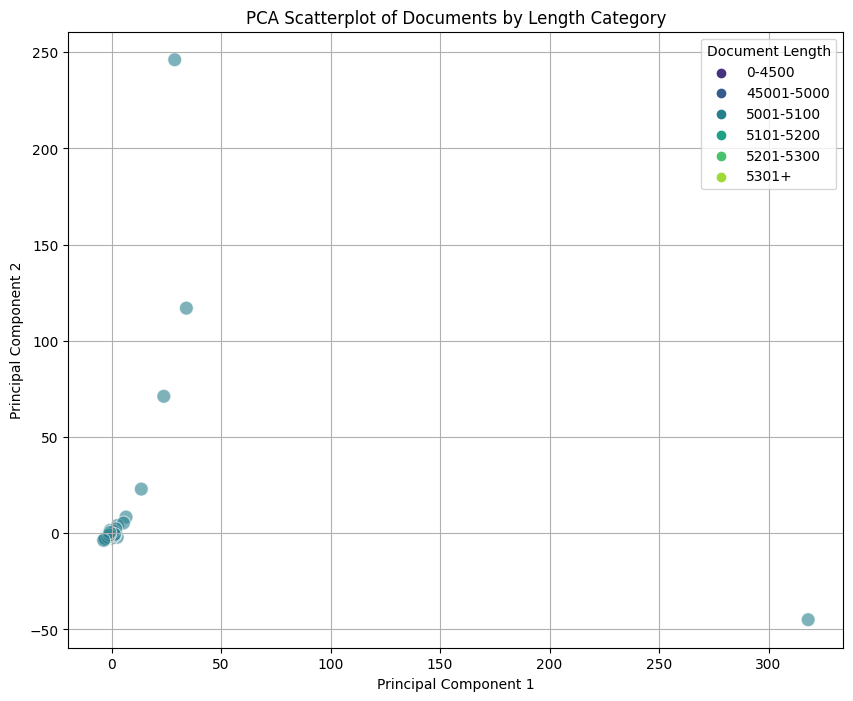

In [74]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue=corpus_df['length_category'], palette='viridis', s=100, alpha=0.6)
plt.title('PCA Scatterplot of Documents by Length Category')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Document Length', loc='best')
plt.grid(True)
plt.show()


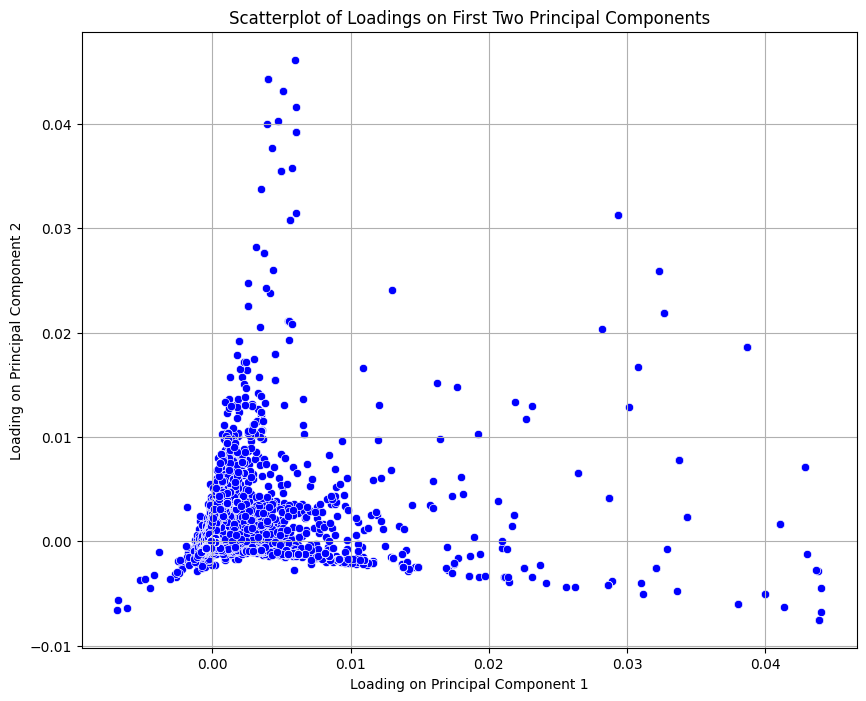

In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=loadings_df['PC1'], y=loadings_df['PC2'], color='blue', marker='o')
plt.title('Scatterplot of Loadings on First Two Principal Components')
plt.xlabel('Loading on Principal Component 1')
plt.ylabel('Loading on Principal Component 2')
plt.grid(True)
plt.show()


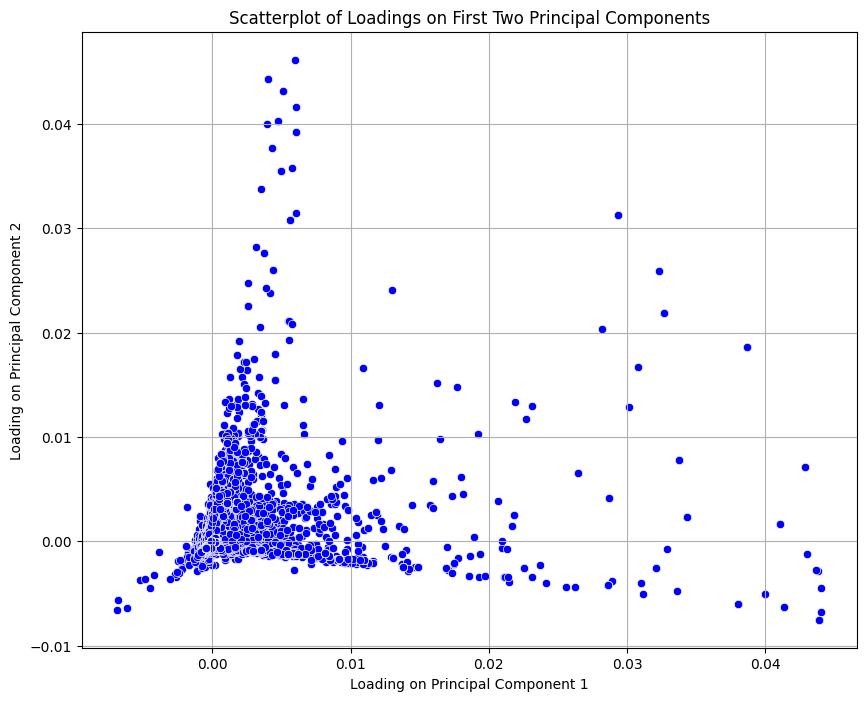

In [61]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=loadings_df, color='blue', marker='o')
plt.title('Scatterplot of Loadings on First Two Principal Components')
plt.xlabel('Loading on Principal Component 1')
plt.ylabel('Loading on Principal Component 2')
plt.grid(True)
plt.show()


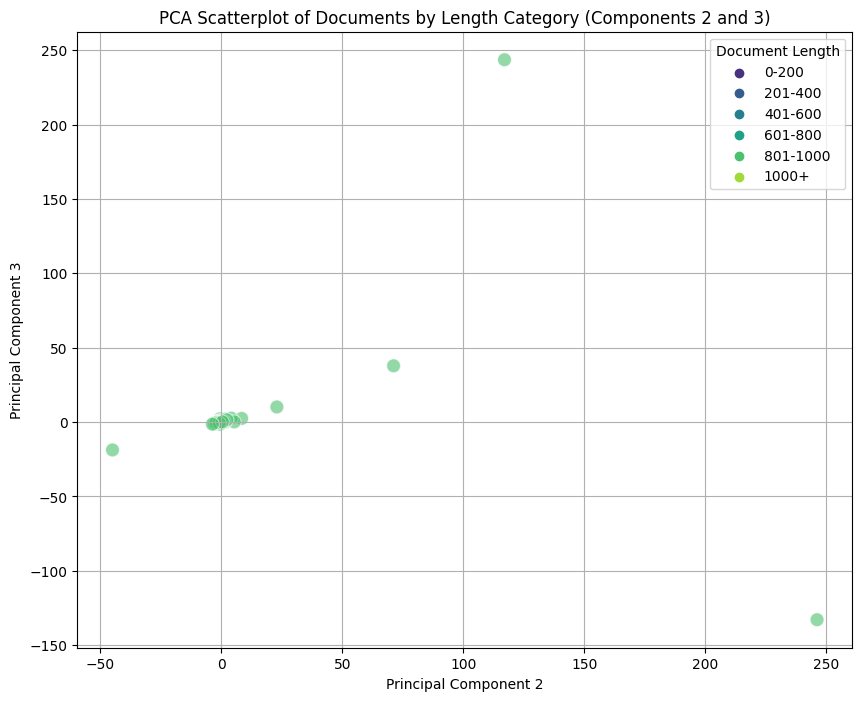

In [62]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', data=principal_df, hue=corpus_df['length_category'], palette='viridis', s=100, alpha=0.6)
plt.title('PCA Scatterplot of Documents by Length Category (Components 2 and 3)')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(title='Document Length', loc='best')
plt.grid(True)
plt.show()


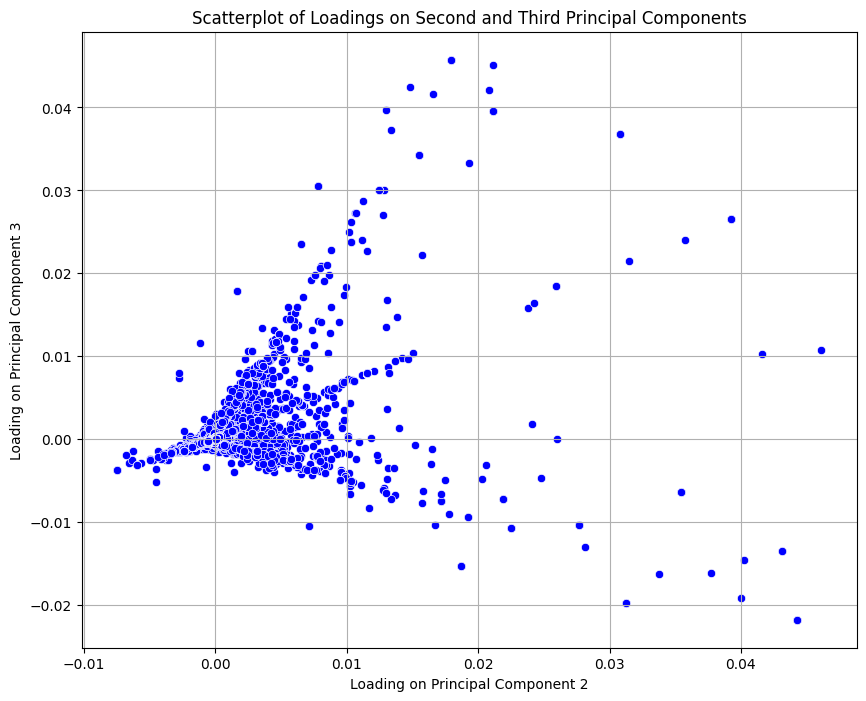

In [63]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x=loadings_df['PC2'], y=loadings_df['PC3'], color='blue', marker='o')
plt.title('Scatterplot of Loadings on Second and Third Principal Components')
plt.xlabel('Loading on Principal Component 2')
plt.ylabel('Loading on Principal Component 3')
plt.grid(True)
plt.show()
